# Problem Statement:

You have been asked to help with planning an ad-hoc communications network over a large
rectangular region. Each individual tower can monitor a rectangular subsection of a specific
width and height. The main problem is that none of the individual towers can provide
coverage for the entire region of interest. Communications towers are unreliable and are put
up independently and at random. You have no control over where or how big a tower’s
footprint is placed. Importantly, due to technical issues such as cross-talk, no individual
rectangular subsection can have multiple towers providing coverage for it. That is, there can
be no overlap between any pair of rectangular subsections provided by the two respective
towers. In any case, the desire is to maximize the coverage area of any available
communications tower.

The order of when the towers come online is important. Once a tower has acquired its
rectangular section, no subsequent tower can overlap that section. You may assume the
following for this problem:

● All rectangular sections have integer-based corners.

● All rectangular sections must be contained in the overall rectangular footprint.

● The height and width of each rectangular section is sampled from a uniform
distribution.

● Positions of the windows are also determined by uniform random distribution.

● All footprints must be rectangles (not general polygons).

● When a new tower comes online, if its coverage rectangle intersects the pre-existing
composite footprint, then that new tower’s coverage is trimmed such that its
maximum remaining coverage area is retained (see sequential diagram below).

Write a detailed Jupyter notebook that implements a solution to this problem such that the
user can supply the following overall size of desired coverage footprint and then determine
the following:

● Given an overall desired coverage footprint and a sequence of n communications
towers, what is the resulting resolved coverage?

● What is the total area of coverage relative to the desired total coverage area of the
original footprint? That is, are there any gaps in coverage?

● On average, how many communications towers are required before full coverage is
obtained?

# Solution:

Initializing classes:

We will begin by creating a class Tower, that will serve to generate a random rectangular area correponding to its own footprint, within the specified coverage length and width. 

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import itertools

colors = itertools.cycle(['blue','yellow','red','purple','black','green'])

class Tower(object):
    def __init__(self,ax,h_cov = 10,w_cov = 10):
        """ 
        Initialize Tower class
        Tower will have a length and width which should be bounded by the overall coverage.
        and a starting position, such that the total rectangle is contained in the footprint.
        
        :param: l_cov
        :type: int
        :param: w_cov
        :type: int
        
        """
        #X and Y coordinate (1)
        self.x = np.random.uniform(0,w_cov)   
        self.y = np.random.uniform(0,h_cov)
        #Length and width (2)
        self.height = np.random.uniform(0,h_cov - self.y)  
        self.width = np.random.uniform(0,w_cov - self.x)
        self.area = self.height*self.width
        
        #Visualize (3)
        ax.add_patch(
        patches.Rectangle(
        (self.x,self.y),   # (x,y)
        self.width,          # width
        self.height,         # height
        linewidth = 2,
        color=next(colors),
        alpha = 0.5
        )
        )

What this class does is the following:

1) Initiate an object with an x and y coordinate found from a random uniform distribution

2) Creates a length and width parameter from a uniform distribution

3) Creates a visual representation of itself by plotting a rectangle with the above parameters on a graph


We can try making three 'Towers' and seeing how they work!

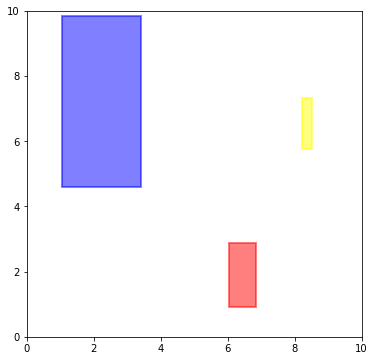

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


fig, ax = plt.subplots(1,figsize=(6,6))
c = 10
a = Tower(ax)
b = Tower(ax)
d = Tower(ax)
ax.set_xlim(0,c)
ax.set_ylim(0,c)
plt.show()

With this preliminary definition, we can see that with every call to Tower, we create a randomly distributed coverage area. However, these areas overlap, and therefore our next task is to define a function that detects when this happens.

To help us to do this, we will need to redefine our Tower class such that we have some more parameters to play with without constantly writing them out. We can think of a rectangle has having four essential coordinates, the corners of the rectangle. We will therefore define them as x1->x4 going from left bottom to right bottom.

We will also include a setting function, that allows us to set the values of the Tower as we like. This will remove the rectangle, affect all coordinates, height and width parameters, and reinstate the rectangle back.

In [285]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import itertools

colors = itertools.cycle(['blue','yellow','red','purple','black','green'])

class Tower(object):
    def __init__(self,ax,h_cov=10,w_cov=10):
        """ 
        Initialize Tower class
        Tower will have a length and width which should be bounded by the overall coverage.
        and a starting position, such that the total rectangle is contained in the footprint.
        
        :param: l_cov
        :type: int
        :param: w_cov
        :type: int
        
        """
        #X and Y coordinate
        self.x1 = np.random.uniform(0,w_cov)   
        self.y1 = np.random.uniform(0,h_cov)
        #Length and width
        self.height = np.random.uniform(0,h_cov - self.y1 - 0.5)  
        self.width = np.random.uniform(0,w_cov - self.x1 - 0.5)
        self.area = self.height*self.width
        #Other coordinates
        self.x2 = self.x1
        self.y2 = self.y1 + self.height
        self.x3 = self.x2 + self.width
        self.y3 = self.y2
        self.x4 = self.x3
        self.y4 = self.y1
        
        self.color = next(colors)
        #Visualize
        self.rect = patches.Rectangle(
        (self.x1,self.y1),   # (x,y)
        self.width,          # width
        self.height,         # height
        linewidth = 2,
        color=self.color,
        alpha = 0.5
        )
        ax.add_patch(self.rect)
        
    def set_x2(self,x):
        """
        set x2 coordinate of tower
        :param: x
        :type: int
        
        """
        self.rect.remove()
        self.x1 = x
        
        #width
        self.width = self.x3 - self.x1
        self.area = self.height*self.width
        #Other coordinates
        self.x2 = self.x1
        self.x3 = self.x2 + self.width
        self.x4 = self.x3
        
        #Visualize
        self.rect = patches.Rectangle(
        (self.x1,self.y1),   # (x,y)
        self.width,          # width
        self.height,         # height
        linewidth = 2,
        color=self.color,
        alpha = 0.5
        )
        ax.add_patch(self.rect)
        
    def set_y2(self,y):
        """
        set y2 coordinate of tower
        :param: x
        :type: int
        
        """
        self.rect.remove()
        self.y2 = y
        
        #width
        self.height = self.y2 - self.y1
        self.area = self.height*self.width
        #Other coordinates
        self.y1 = self.y2 - self.height
        self.y3 = self.y2
        self.y4 = self.y1
        
        #Visualize
        self.rect = patches.Rectangle(
        (self.x1,self.y1),   # (x,y)
        self.width,          # width
        self.height,         # height
        linewidth = 2,
        color=self.color,
        alpha = 0.5
        )
        ax.add_patch(self.rect)
        
    def set_x4(self,x):
        """
        set x4 coordinate of tower
        :param: x
        :type: int
        
        """
        self.rect.remove()
        self.x3 = x
        
        #width
        self.width = self.x3 - self.x1
        self.area = self.height*self.width
        #Other coordinates
        self.x2 = self.x1
        self.x4 = self.x3
        
        #Visualize
        self.rect = patches.Rectangle(
        (self.x1,self.y1),   # (x,y)
        self.width,          # width
        self.height,         # height
        linewidth = 2,
        color=self.color,
        alpha = 0.5
        )
        ax.add_patch(self.rect)
        
    def set_y4(self,y):
        """
        set y4 coordinate of tower
        :param: x
        :type: int
        
        """
        self.rect.remove()
        self.y1 = y
        
        #width
        self.height = self.y2 - self.y1
        self.area = self.height*self.width
        #Other coordinates
        self.y3 = self.y2
        self.y4 = self.y1
        
        #Visualize
        self.rect = patches.Rectangle(
        (self.x1,self.y1),   # (x,y)
        self.width,          # width
        self.height,         # height
        linewidth = 2,
        color=self.color,
        alpha = 0.5
        )
        ax.add_patch(self.rect)
        
        
        
        
        
        

Now, let's define our overlap detector function. This function will work on the thought process as follows.

Any one of four conditions guarantees that no overlap can exist:

Condition 1: If A's left edge is to the right of the B's right edge, then A is entirely to right of B

Condition 2: If A's right edge is to the left of the B's left edge, then A is entirely to left of B

Condition 3: If A's top edge is below B's bottom edge, then A is entirely below B

Condition 4: If A's bottom edge is above B's top edge, then A is entirely above B

Therefore (1) or (2) or (3) or (4) will guarantee that there is no overlap. Therefore to detect an overlap, it is NOT(1 or 2 or 3 or 4).

Applying DeMorgan's Rule, 
NOT(1 or 2 or 3 or 4) = NOT 1 and NOT 2 and NOT 3 and NOT 4.

NOT 1 equates to the A.x2 < B.x4, NOT 2 equates to A.x4 > B.x2, etc.


In [286]:
def detect_Overlap(tower1,tower2):
    """
    detects if two towers intersect
    :param: tower1
    :type: Tower
    :param: tower2
    :type: Tower
    
    """
    if tower1.x2 < tower2.x4 and tower1.x4 > tower2.x2 \
    and tower1.y4 < tower2.y2 and tower1.y2 > tower2.y4:
        return True
    else:
        return False
        

In [287]:
def create_Tower(rep,ax,c_h = 10,c_w = 10):
    """
    creates towers on repeat, for as many as rep
    checks if the tower overlapped with all the previous ones
    returns number of overlaps
    :param: rep
    :type: int
    :param: ax
    :type: fig/plt
    :param: c_h
    :type: int
    :param: c_w
    :type: int
    
    """
    assert isinstance(rep,int)
    towers = []
    overlap = 0
    for i in xrange(0,rep):
        a = Tower(ax)
        towers.append(a)
        for j in xrange(0,len(towers)-1):
            if detect_Overlap(towers[j],a) is True:
                overlap += 1
    print overlap

1


(0, 10)

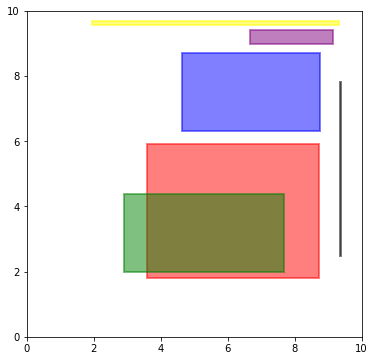

In [288]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


fig, ax = plt.subplots(1,figsize=(6,6))
c = 10
create_Tower(6,ax)
ax.set_xlim(0,c)
ax.set_ylim(0,c)

We can see that our function is working well, consistenly detecting overlaps only when they occur. We now need to develop a function that will, once finding this overlap, will 'trim' the tower down so that there is no overlap. We can think of this as simply setting the new tower's offending edge coordinates to be equal to the old tower's opposite edge coordinate.

In [289]:
def trim_Tower(tower1,tower2):
    """
    trims tower2 down wrt tower1
    :param: tower1
    :type: Tower
    :param: tower2
    :type: Tower
    
    """
    
    #if entirely contained, destroy tower
    if tower2.x2 >= tower1.x2 and tower2.x4 <= tower1.x4 and tower2.y2 <= tower1.y2 and tower2.y4 >= tower1.y4:
        tower2.set_x2(0)
        tower2.set_x4(0)
        tower2.set_y2(0)
        tower2.set_y4(0)
    
    #test an edge
    #if the other edge is also sticking out
    #compare area 
    if tower2.x4 > tower1.x4:
        if tower2.x2 < tower1.x2:
            if (tower2.x4 - tower1.x4)*(tower2.height) < (tower2.x2 - tower1.x2)*(tower2.height):
                tower2.set_x4(tower1.x2)
        else:
            tower2.set_x2(tower1.x4)
     
    if detect_Overlap(tower1,tower2) == False:
        return
        
    if tower2.y4 > tower1.y4:
        if tower2.y2 < tower1.y2:
            if (tower2.y4 - tower1.y4)*(tower2.width) < (tower2.y2 - tower1.y2)*(tower2.width):
                tower2.set_y4(tower1.y2)
        else:
            tower2.set_y2(tower1.y4)
            
    if detect_Overlap(tower1,tower2) == False:
        return
        
        
    if tower2.x2 < tower1.x2:
        if tower2.x4 > tower1.x4:
            if (tower1.x2 - tower2.x2)*tower2.height < (tower2.x4 - tower1.x4)*tower2.height:
                tower2.set_x2(tower1.x4)
        else:
            tower2.set_x4(tower1.x2)
            
    if detect_Overlap(tower1,tower2) == False:
        return
     
    if tower2.y2 < tower1.y2:
        if tower2.y4 > tower1.y4:
            if (tower1.y2 - tower2.y2)*tower2.width < (tower2.y4 - tower1.y4)*tower2.width:
                tower2.set_y2(tower1.y4)
        else:
            tower2.set_y4(tower1.y2)

Let's try this out, but with more debugging features enabled. We'll create Towers of known coordinates, observe them, then run additional code to trim it down and observe the result, so we can see what our code really does.

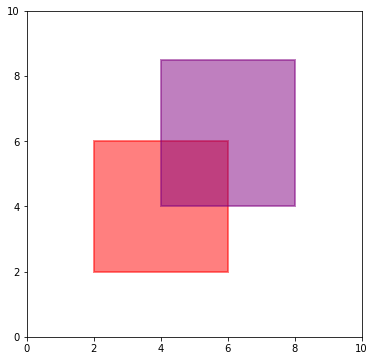

In [294]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
fig, ax = plt.subplots(1,figsize=(6,6))
c = 10
a = Tower(ax)
a.set_x2(2)
a.set_y2(6)
a.set_x4(6)
a.set_y4(2)
b = Tower(ax)
b.set_x2(4)
b.set_y2(8.5)
b.set_x4(8)
b.set_y4(4)
ax.set_xlim(0,c)
ax.set_ylim(0,c)
#run this after
"""
if detect_Overlap(a,b) is True:
    trim_Tower(a,b)
"""
plt.show()


While this does trim down the tower so there's no overlap, it doesn't quite make the distinction between the best possible area to keep. We can see that simply checking over one dimension is not going to cut it, so we'll need a more definitive way of solving this problem. Let's assess all sizes at once, and use a dictionary to store these values. Then, we can take a maximum to find the largest area out of overlap and choose that to make our tower.

In [325]:
def trim_Tower(tower1,tower2):
    """
    trims tower2 down wrt tower1
    :param: tower1
    :type: Tower
    :param: tower2
    :type: Tower
    
    """
    
    #if entirely contained, destroy tower
    if tower2.x2 >= tower1.x2 and tower2.x4 <= tower1.x4 and tower2.y2 <= tower1.y2 and tower2.y4 >= tower1.y4:
        tower2.set_x2(0)
        tower2.set_x4(0)
        tower2.set_y2(0)
        tower2.set_y4(0)
        
    overlaps = {'x2':0,'x4':0,'y2':0,'y4':0}
    overlaps['x2'] = abs(tower2.x2 - tower1.x2)
    overlaps['x4'] = abs(tower2.x4 - tower1.x4)
    overlaps['y2'] = abs(tower2.y2 - tower1.y2)
    overlaps['y4'] = abs(tower2.y4 - tower1.y4)
    
    
    while detect_Overlap(tower1,tower2) == True:
        sel = max(overlaps, key=overlaps.get)
        print sel
        if sel == 'x2':               
            place = tower2.x4
            if tower1.x2 > tower2.x2:
                tower2.set_x4(tower1.x2)
            if detect_Overlap(tower1,tower2) == True:
                tower2.set_x4(place)
                overlaps.pop('x2', None)
                sel = max(overlaps, key=overlaps.get)

        if sel == 'x4':
            place = tower2.x2
            if tower1.x4 < tower2.x4:
                tower2.set_x2(tower1.x4)
            if detect_Overlap(tower1,tower2) == True:
                tower2.set_x2(place)
                overlaps.pop('x4',None)
                sel = max(overlaps, key=overlaps.get)

        if sel == 'y2':
            place = tower2.y4
            if tower1.y2 < tower2.y2:
                tower2.set_y4(tower1.y2)
            if detect_Overlap(tower1,tower2) == True:
                tower2.set_y4(place)
                overlaps.pop('y2',None)
                sel = max(overlaps, key=overlaps.get)


        if sel == 'y4':
            place = tower2.y2
            if tower1.y4 > tower2.y4:
                tower2.set_y2(tower1.y4)
            if detect_Overlap(tower1,tower2) == True:
                tower2.set_y2(place)
                overlaps.pop('y4',None)
                sel = max(overlaps, key=overlaps.get)

x4


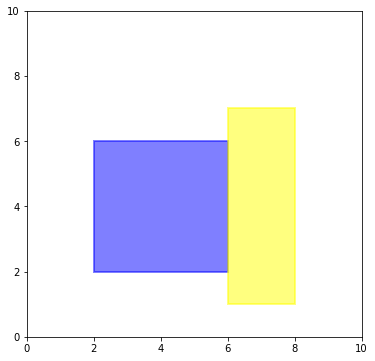

In [342]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
fig, ax = plt.subplots(1,figsize=(6,6))
c = 10
a = Tower(ax)
a.set_x2(2)
a.set_y2(6)
a.set_x4(6)
a.set_y4(2)
b = Tower(ax)
b.set_x2(1)
b.set_y2(7)
b.set_x4(8)
b.set_y4(1)
ax.set_xlim(0,c)
ax.set_ylim(0,c)
#run this after

if detect_Overlap(a,b) is True:
    trim_Tower(a,b)

plt.show()